# title: 

For some basic reading about how pytorch implements automatic differentiation at a high-level, you can look at this [link](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)

This [paper](https://www.jmlr.org/papers/volume18/17-468/17-468.pdf) details why machine learning methods primarily uses automatic differentiation. This [paper](https://arxiv.org/pdf/1811.05031.pdf) is just a review of how it works and is where the table below is from.

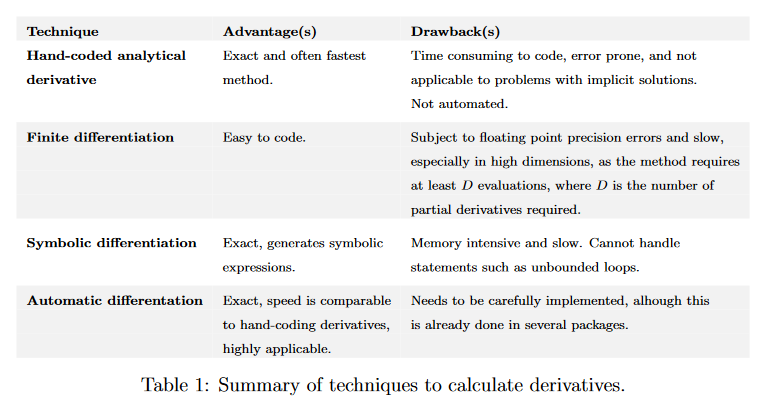

## Example

Let $$f(x_1, x_2) = (\log(x_1x_2), \sin(x_2))$$ and $$g(x_1, x_2) = x_1x_2$$

In [1]:
import torch

def f(x):
    return((torch.log(x[0] * x[1]), torch.sin(x[1])))

def g(x):
    return(x[0] * x[1])

# computational graph is not recorded by default, need to set the requires_grad flag to be True
x = torch.tensor([0.5, 0.75], requires_grad=True)
y = g(f(x))

# computes the gradient of the current tensor w.r.t graph leaves
y.backward()

print(x.grad)

tensor([1.3633, 0.1912])


## Manual derivative

Note that
$$\nabla g(f(x_1, x_2)) = \begin{bmatrix} \frac{\sin(x_2)}{x_1} \\\frac{\sin(x_2)}{x_2} + \log(x_1x_2)cos(x_2)\end{bmatrix}$$

In [2]:
dx1 = (torch.sin(x[1])/x[0]).item()
dx2 = (torch.sin(x[1])/x[1] + torch.log(x[0]*x[1])*torch.cos(x[1])).item()
print(round(dx1, 4), round(dx2, 4))

1.3633 0.1912


## Numerical derivative

In [3]:
dx = torch.zeros(2)
dx[0] = (g(f(x + torch.tensor([1e-3, 0]))) - y)/1e-3
dx[1] = (g(f(x + torch.tensor([0, 1e-3]))) - y)/1e-3
print(dx)

tensor([1.3619, 0.1919], grad_fn=<CopySlices>)


## Example use case in linear regression

Let's do this for a simple linear regression problem:

In [13]:
import torch
from torch.nn import Parameter  # Import the Parameter class

# The data function is: y = x + 10
n = 100
x_train = torch.randn(n, dtype=torch.float)
y_train = 2 + x_train + torch.randn(n, dtype=torch.float)

# Initialize Linear Regression parameters
b0 = torch.randn(1, requires_grad=True, dtype=torch.float)
b1 = torch.randn(1, requires_grad=True, dtype=torch.float)

model = [Parameter(b0), Parameter(b1)]  # Correctly imported Parameter class

# Set up the optimizer
optimizer = torch.optim.SGD(model, lr=0.1)

# Run optimization loop
for epoch in range(500):
    # Remove the grad computed in the last step
    optimizer.zero_grad()

    # Compute predicted value
    y_predicted = model[0] + model[1] * x_train

    # Calculate the loss function
    # since this is the entire training set, this is effectively using the GD algorithm
    loss = torch.mean((y_train - y_predicted)**2)

    # Compute gradients
    loss.backward()

    # Update model parameters
    optimizer.step()

    if epoch % 100 == 0:
      print(f"Epoch {epoch}: Loss = {loss.item()}")
      print("Gradient w.r.t b0:", model[0].grad)
      print("Gradient w.r.t b1:", model[1].grad)

# output the final parameters
print("b0:", model[0].item())
print("b1:", model[1].item())


Epoch 0: Loss = 4.773470401763916
Gradient w.r.t b0: tensor([-2.9494])
Gradient w.r.t b1: tensor([-2.8822])
Epoch 100: Loss = 1.0072836875915527
Gradient w.r.t b0: tensor([-4.8429e-07])
Gradient w.r.t b1: tensor([3.5763e-07])
Epoch 200: Loss = 1.0072836875915527
Gradient w.r.t b0: tensor([-4.8429e-07])
Gradient w.r.t b1: tensor([3.5763e-07])
Epoch 300: Loss = 1.0072836875915527
Gradient w.r.t b0: tensor([-4.8429e-07])
Gradient w.r.t b1: tensor([3.5763e-07])
Epoch 400: Loss = 1.0072836875915527
Gradient w.r.t b0: tensor([-4.8429e-07])
Gradient w.r.t b1: tensor([3.5763e-07])
b0: 1.818988561630249
b1: 1.00831937789917


End 
